# The Transformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case a third degree polynomial: $f(x) = x^3$, in the interval $[0, C]$ where $C$ is a number that ensures that the function if properly normalized.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem:
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](http://pdg.lbl.gov/2020/reviews/rpp2020-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 29-11-2022 (latest update)

***

In [88]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats

Load external functions:

In [89]:
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

set the parameters of the program:

In [90]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000      # Number of random points used 

xmin = 0
xmax = np.sqrt(2)           # Find out yourself what a good interval is.
N_bins = 200          # Find out yourself what a good number of bins is.

# f(x):
def fx_plot(x) :
    # Only used to check the distibution actually macthes.
    norm = N_points * (xmax - xmin) / N_bins 
    return norm * x**3 

In [91]:
# Define the numpy arrays to be filled:
x_transformation = np.zeros(N_points)
x_accepted       = np.zeros(N_points)
def Finv(u):
    return (4 * u)**(1/4)

u = r.random(N_points)
x_transformation = Finv(u)
print(x_transformation)

[1.10634247 1.3964568  1.30810278 ... 1.39498327 1.12291272 0.96538414]


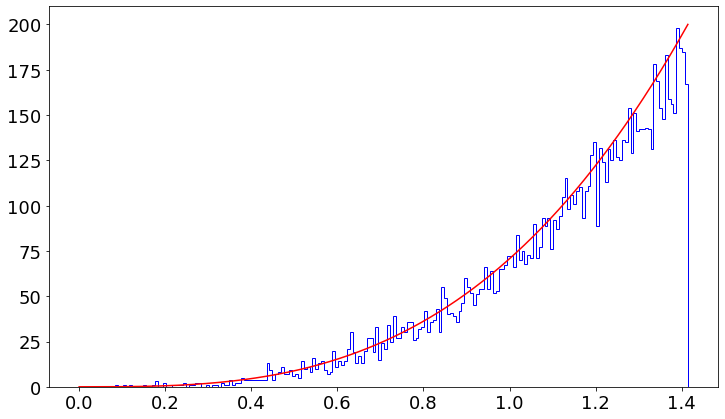

In [92]:
fig, ax = plt.subplots(figsize = (12,7), facecolor = "white")

x_plot = np.linspace(xmin, xmax, N_points)

ax.hist(x_transformation, bins = N_bins, histtype = "step", color = "b")
ax.plot(x_plot, fx_plot(x_plot), color = "r")

In [93]:
ymax = 2 * np.sqrt(2)
ymin = 0

def fx(x) :
    return x**3 

def testrecurve(func, xmin, xmax, ymin, ymax, N_points):
    # Recursive function to do accept/reject monte carlo simulation
    xran = r.uniform(xmin, xmax, N_points)
    yran = r.uniform(ymin, ymax, N_points)
    xfunc = func(xran)
    xkeep = xran[xfunc > yran]
    missing = N_points - len(xkeep)
    if missing > 0:
        xrest, tries = testrecurve(func, xmin, xmax, ymin, ymax, missing)
    else:
        xrest = np.array([])
        tries = 0
    finalx = np.append(xkeep, xrest)
    finaltries = N_points + tries
    return finalx, finaltries

x_accepted1, N_try1 = testrecurve(fx, xmin, xmax, ymin, ymax, N_points)

In [94]:
eff = N_points / N_try1                        

# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N_try1) 

# Integral
integral =  eff * (xmax-xmin) * (ymax-ymin)

# Error on integral
eintegral = eff_error * (xmax-xmin) * (ymax-ymin) 


print(integral, eintegral)

0.996537033807519 0.00863524348629036


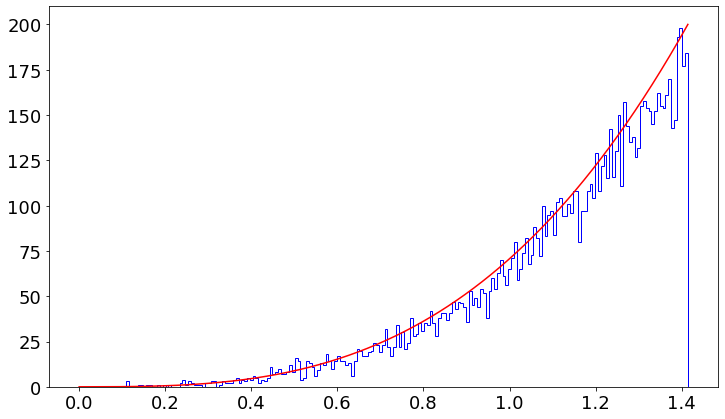

In [96]:
fig, ax = plt.subplots(figsize = (12,7), facecolor = "white")

x_plot = np.linspace(xmin, xmax, N_points)

ax.hist(x_accepted1, bins = N_bins, histtype = "step", color = "b")
ax.plot(x_plot, fx_plot(x_plot), color = "r")
plt.show()

## Problem: 

1) Calculate $C$ such that f(x) is normalised [Analytical problem].

2) Calculate the relevant integral (below) and inverted function for using the transformation method. Check that the limits actually makes sense [Analytical problem]. Note that it is important to include the limits!

$$F(x) = \int_{-\infty}^{x} f(x') dx'$$

Dont know why the lower bound is -inf, as that would give an inf area in this case. It makes more sense that the lower bound is 0, so that it is just an exchange of variables. Could also just the indefinite integral?

$F(x) = \frac{1}{4} \cdot x^{4}$ and we have that $ u = F(x)$
so $ x = (4u)^{1/4} $
Here we can also the that if $ u \in (0,1) \rightarrow x \in (0, \sqrt{2})$ this is what we would expect. 


3) Produce random points following $f(x) = x^3$, in the interval $[0, C]$ using **both** the Transformation and the Accept/Reject method.

Why limits in the accept/reject method is $ x \in [0,\sqrt{2}], \: y \in [0, 2\sqrt{2}]$

4) Fit your data with a third degree polynomial, and check that the coefficients correspond to what you would expect.

5) Now try to change the interval from [0,C] to [1,C], and see how the limits change.

# Learning points:

As a basic principle, this exercise should make you capable of using two methods for generating random numbers according to a 1D PDF f(x) based on uniform random numbers (provided by a standard algorithm):
1. Transformation method (using integral+inverse of f(x))
2. Accept-Reject method (using sampling in 2D compared to f(x))

You should know:
1. The advantages and limitations of each method.
2. How to get the desired result out of each method.

Finally, you should understand the motivation behind generating random numbers according to a given distribution, namely for simulating complicated situations (e.g. experimental setup), and evaluating the outcome.